In [23]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

np.random.seed(42)

In [6]:
churn = pd.read_csv('/Users/huangzm/Desktop/Intro BA/HW1_Data.csv')
churn.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


### Exploring Dataset

In [19]:
X = churn.iloc[:,:-1]
y = churn.iloc[:,-1]

In [141]:
X.isnull().sum()

revenue     0
outcalls    0
incalls     0
months      0
eqpdays     0
webcap      0
marryyes    0
travel      0
pcown       0
creditcd    0
retcalls    0
dtype: int64

In [143]:
y.isnull().sum()

0

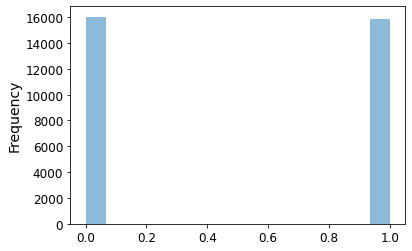

In [139]:
y.plot.hist(bins=15, alpha=0.5)

In [233]:
unique, counts = np.unique(y, return_counts=True)
print("The frequency of instances per class of churndep: " , dict(zip(unique, counts)))

The frequency of instances per class of churndep:  {0: 16036, 1: 15855}


In [138]:
for i in range(5,10):
    unique, counts = np.unique(X.iloc[:,i], return_counts=True)
    print("The frequency of instances per class of " + X.columns[i]+":" , dict(zip(unique, counts)))

The frequency of instances per class of webcap: {0: 3358, 1: 28533}
The frequency of instances per class of marryyes: {0: 20309, 1: 11582}
The frequency of instances per class of travel: {0: 30068, 1: 1823}
The frequency of instances per class of pcown: {0: 25997, 1: 5894}
The frequency of instances per class of creditcd: {0: 10303, 1: 21588}


In [42]:
def get_statistics(df):    
    df0 = pd.DataFrame([], columns=["nobs","minmax","mean","variance","skewness","kurtosis"])
    for i in range(0,len(df.columns)):
        a = sp.stats.describe(df.iloc[:,i])
        df1 = pd.DataFrame([a], index=[df.columns[i]], columns=a._fields)
        df0 = pd.concat([df0,df1])        
    return df0

In [43]:
get_statistics(X)

,nobs,minmax,mean,variance,skewness,kurtosis
revenue,31891,"(-5.86, 861.11)",58.665179,1950.446486,3.833306,31.509757
outcalls,31891,"(0.0, 610.33)",24.951385,1210.354349,3.505440,21.781605
incalls,31891,"(0.0, 404.0)",8.065277,275.911654,5.628748,57.637463
months,31891,"(6, 60)",18.761908,91.164665,1.047712,0.860338
eqpdays,31891,"(-5, 1812)",391.222633,65024.223936,1.030755,1.347562
webcap,31891,"(0, 1)",0.894704,0.094212,-2.571908,4.614710
marryyes,31891,"(0, 1)",0.363175,0.231286,0.569022,-1.676214
travel,31891,"(0, 1)",0.057163,0.053897,3.815013,12.554321
pcown,31891,"(0, 1)",0.184817,0.150664,1.624031,0.637475
creditcd,31891,"(0, 1)",0.676931,0.218702,-0.756682,-1.427432


## Model Construction

In [341]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import figure

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [347]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix \nWithout Normalization',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        title = 'Normalized Confusion Matrix'
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black",
                 #backgroundcolor="black",
                 fontsize = 15)
                 #color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1. Build a decision tree model that predicts whether a consumer will terminate his/her contract. In particular, I would like for you to create a decision tree using entropy with no max depth. Some possible issues / hints to think about: using training vs. test datasets.

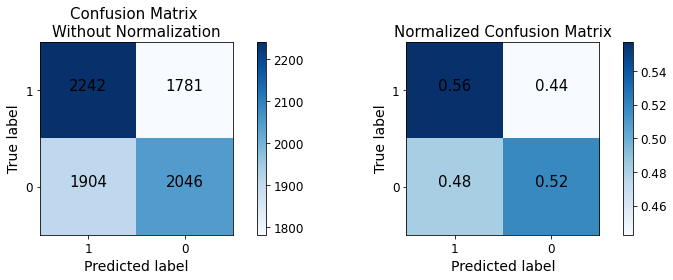

In [351]:
dt0 = tree.DecisionTreeClassifier(criterion = "entropy")
y_pred = dt0.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=y.unique())

plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=y.unique(), normalize=True)

plt.show()   

### 2. Explore how well the decision trees perform for several different parameter values (e.g., for different splitting criteria). 

#### a. Explore different *criterion*,  and *max_depth* 

In [352]:
def try_different_parameters(criterion="gini", splitter="best", max_depth=None):
    dt = tree.DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_depth = max_depth)
    y_pred = dt.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    TP = cnf_matrix[0,0]
    FP = cnf_matrix[0,1]
    FN = cnf_matrix[1,0]
    TN = cnf_matrix[1,1]
    accuracy = (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0])
    precision = cnf_matrix[0,0]/(cnf_matrix[0,1]+cnf_matrix[0,0])
    df = pd.DataFrame([[criterion, splitter, max_depth, accuracy, precision, TP, FP, FN, TN]],
                      columns=['Criterion','Splitter','MaxDepth','Accuracy','Precision','TP','FP','FN','TN'],
                      index=None)
    return df

In [394]:
df_entropy = pd.DataFrame()
df_gini = pd.DataFrame()
df_random = pd.DataFrame()
for i in np.arange(1, 30, 1):
    df1 = try_different_parameters(criterion="entropy",max_depth=i)
    df_entropy = pd.concat([df_entropy,df1])  
    df2 = try_different_parameters(criterion="gini",max_depth=i)
    df_gini = pd.concat([df_gini,df2]) 
    df3 = try_different_parameters(splitter="random",max_depth=i)
    df_random = pd.concat([df_random,df3]) 
#print(df_entropy.to_string(index=False))

d = pd.DataFrame({'acc_gini':pd.Series(df_gini.Accuracy),
                  'acc_entropy':pd.Series(df_entropy.Accuracy),
                  'acc_random':pd.Series(df_random.Accuracy),
                  'pre_gini':pd.Series(df_gini.Precision),
                  'pre_entropy':pd.Series(df_entropy.Precision),
                  'pre_random':pd.Series(df_random.Precision),
                  'max_depth':pd.Series(df_gini.MaxDepth)})

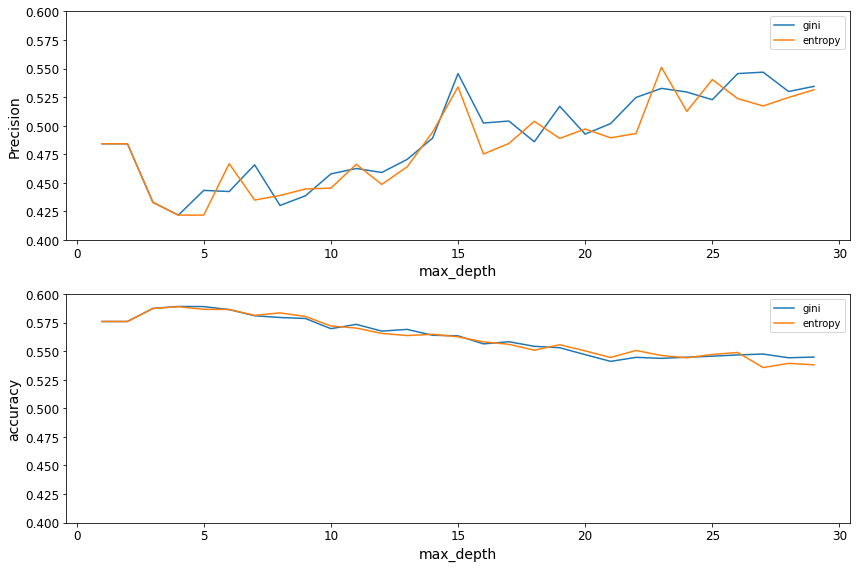

In [396]:
figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot('max_depth','pre_gini', data=d, label='gini')
plt.plot('max_depth','pre_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('Precision')
plt.ylim(0.4, 0.6)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.ylim(0.4, 0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [515]:
# select cretirion = 'gini' and max_depth = 15

#### b. Explore different combination of *min_samples_leaf* and *min_samples_split*

In [497]:
df_split_and_leaf = pd.DataFrame()
for i in np.arange(1, 100, 2):
    for j in np.arange(0.01, 1, 0.02):
        dt = tree.DecisionTreeClassifier(criterion = "gini", splitter = "best", 
                                     max_depth = 15, min_samples_leaf = i, min_samples_split = j)
        y_pred = dt.fit(X_train, y_train).predict(X_test)
        cnf_matrix = confusion_matrix(y_test, y_pred)
        accuracy = (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0])
        precision = cnf_matrix[0,0]/(cnf_matrix[0,1]+cnf_matrix[0,0])
        min_sample_perf = pd.DataFrame([[i,j, accuracy, precision]],
                      columns=['Min_Sample_Leaf','Min_Sample_Split','Accuracy','Precision'],
                      index=None)
        df_split_and_leaf = pd.concat([df_split_and_leaf,min_sample_perf]) 

<Figure size 432x288 with 0 Axes>

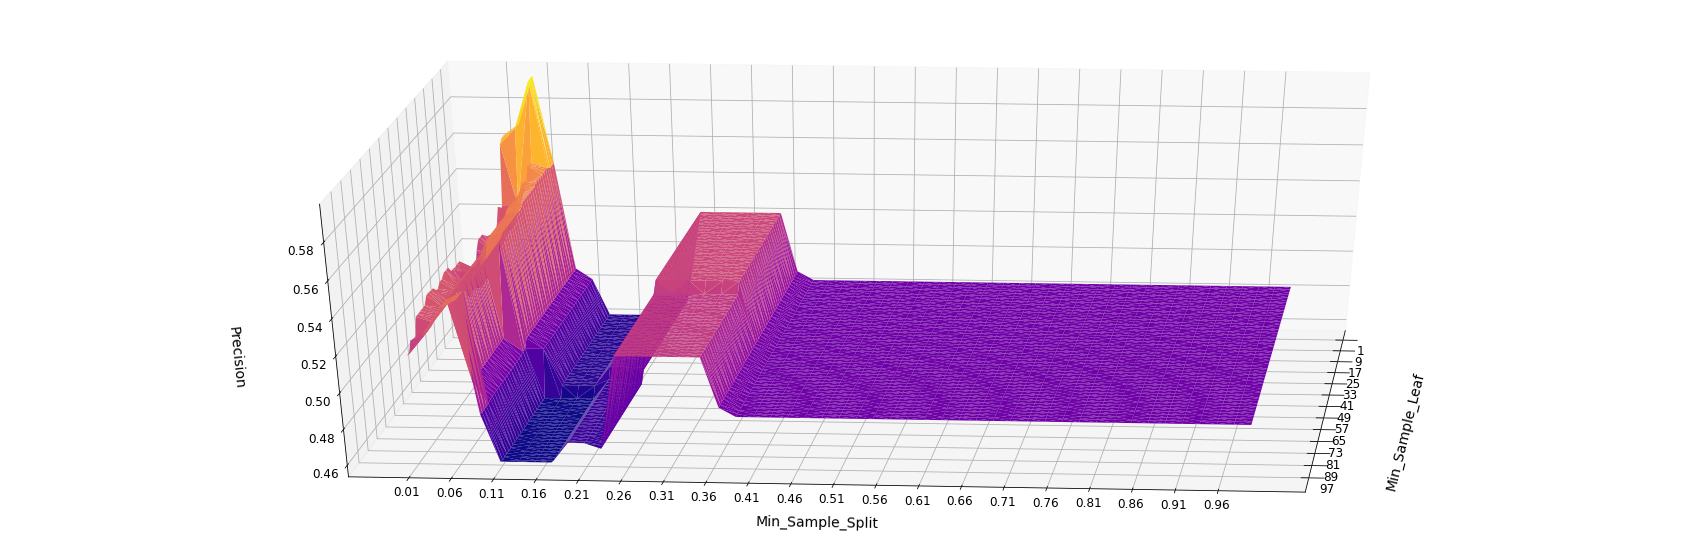

In [500]:
from mpl_toolkits import mplot3d
fig = plt.figure()
figure(figsize=(30, 10)) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_split_and_leaf.Min_Sample_Leaf, 
             df_split_and_leaf.Min_Sample_Split,
             df_split_and_leaf.Precision,
             cmap='plasma', edgecolor='none') #viridis #trisurf

ax.set_xlabel('Min_Sample_Leaf')
ax.set_ylabel('Min_Sample_Split')
ax.set_zlabel('Precision')
plt.xticks(np.arange(min(df_split_and_leaf.Min_Sample_Leaf), max(df_split_and_leaf.Min_Sample_Leaf), 8))
plt.yticks(np.arange(min(df_split_and_leaf.Min_Sample_Split), max(df_split_and_leaf.Min_Sample_Split), 0.05))
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30
ax.zaxis.labelpad = 30

ax.view_init(30, 5)
plt.draw()

In [499]:
df_split_and_leaf.loc[df_split_and_leaf['Precision']==max(df_split_and_leaf['Precision'])]

,Min_Sample_Leaf,Min_Sample_Split,Accuracy,Precision
0,1,0.05,0.585727,0.59657
0,3,0.05,0.585727,0.59657
0,5,0.05,0.585727,0.59657


In [516]:
# select min_samples_leaf = 5 and min_samples_split = 0.05

#### c. try different max_depth given min_samples_leaf = 5 and min_samples_split = 0.05

In [513]:
for i in np.arange(1, 30, 1):
    dt_testing = tree.DecisionTreeClassifier(criterion = "gini", 
                                  splitter = "best", 
                                  max_depth = i,
                                  min_samples_leaf = 5,
                                  min_samples_split = 0.05)
    dt_testing.fit(X_train, y_train)
    y_pred = dt_testing.fit(X_train, y_train).predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0])
    precision = cnf_matrix[0,0]/(cnf_matrix[0,1]+cnf_matrix[0,0])
    print("When max_depth = " + str(i) + ": " + "accuracy: " + str(round(accuracy,5)) + "  precision: " + str(round(precision,5)))

When max_depth = 1: accuracy: 0.57594  precision: 0.48422
When max_depth = 2: accuracy: 0.57594  precision: 0.48422
When max_depth = 3: accuracy: 0.58736  precision: 0.43301
When max_depth = 4: accuracy: 0.58911  precision: 0.42182
When max_depth = 5: accuracy: 0.58961  precision: 0.43947
When max_depth = 6: accuracy: 0.58824  precision: 0.44221
When max_depth = 7: accuracy: 0.58711  precision: 0.47552
When max_depth = 8: accuracy: 0.58698  precision: 0.47502
When max_depth = 9: accuracy: 0.58635  precision: 0.47676
When max_depth = 10: accuracy: 0.58472  precision: 0.49739
When max_depth = 11: accuracy: 0.58497  precision: 0.49814
When max_depth = 12: accuracy: 0.58497  precision: 0.49814
When max_depth = 13: accuracy: 0.58548  precision: 0.51056
When max_depth = 14: accuracy: 0.58598  precision: 0.54661
When max_depth = 15: accuracy: 0.58573  precision: 0.59657
When max_depth = 16: accuracy: 0.58548  precision: 0.55009
When max_depth = 17: accuracy: 0.5856  precision: 0.55655
When ma

In [514]:
# max_depth = 15 indeed gives the best performance

### Plot the Best Model

accuracy: 0.58573  precision: 0.59657



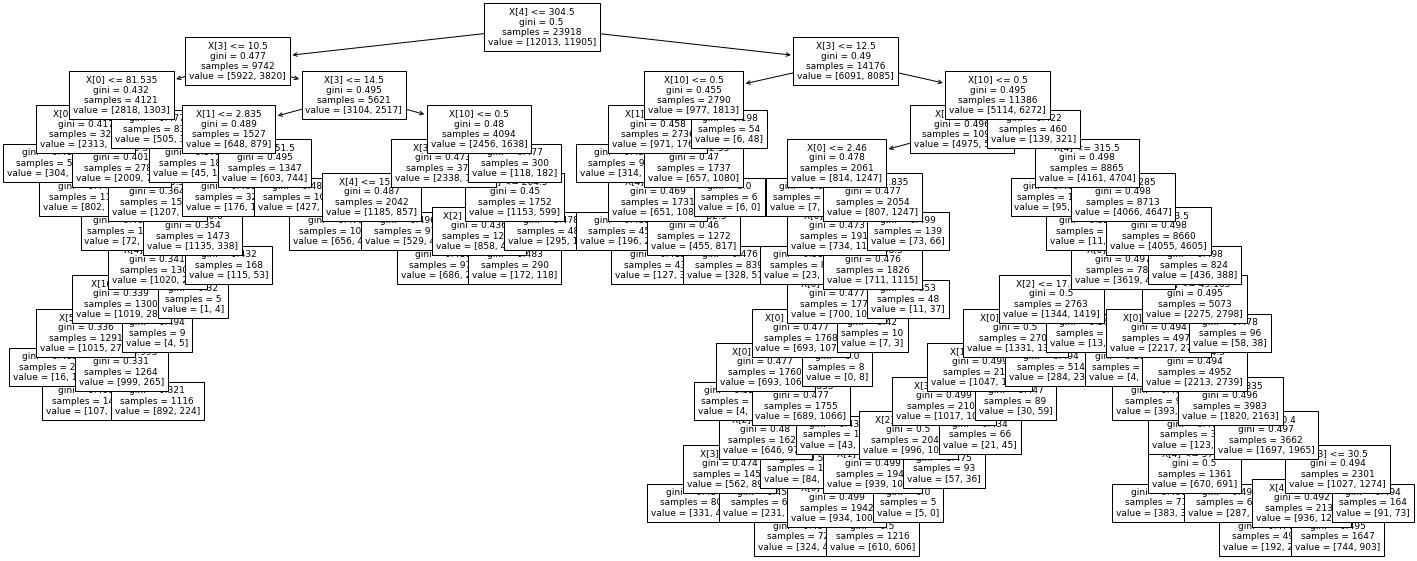

In [508]:
dt1 = tree.DecisionTreeClassifier(criterion = "gini", 
                                  splitter = "best", 
                                  max_depth = 15,
                                  min_samples_leaf = 5,
                                  min_samples_split = 0.05)
dt1.fit(X_train, y_train)

y_pred = dt1.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
accuracy = (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0])
precision = cnf_matrix[0,0]/(cnf_matrix[0,1]+cnf_matrix[0,0])
print("accuracy: " + str(round(accuracy,5)) + "  precision: " + str(round(precision,5)))
print("")

plt.figure(figsize=(25,10))  
tree.plot_tree(dt1, fontsize=9)
plt.show()
#fig.savefig("/Users/huangzm/Desktop/Intro BA/decistion_tree.png")

In [509]:
text_representation = tree.export_text(dt1)
print("accuracy: " + str(round(accuracy,2)) + "  precision: " + str(round(precision,2)))
print("")
print(text_representation)

accuracy: 0.59  precision: 0.6

|--- feature_4 <= 304.50
|   |--- feature_3 <= 10.50
|   |   |--- feature_0 <= 81.53
|   |   |   |--- feature_0 <= 30.07
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  30.07
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |--- feature_3 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  6.50
|   |   |   |   |   |   |--- feature_1 <= 50.00
|   |   |   |   |   |   |   |--- feature_4 <= 303.50
|   |   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 34.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  34.00
|   |   |   |   |   |   |   | 